# XGBoost 모델 테스트
---

In [165]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

## [1] 데이터 로딩
---

In [166]:
target = pd.read_csv("./data/target.csv")

data = pd.read_csv("./data/data_tomato.csv")
data.drop(columns=["DATE"], inplace=True)

In [167]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    300 non-null    object
 1   CIVIL   300 non-null    int64 
 2   IND     300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TCL_AT              300 non-null    float64
 1   TCL_LT              300 non-null    float64
 2   TCL_HT              300 non-null    float64
 3   TEMP_EF_CAP         300 non-null    float64
 4   TEMP_EF_DONGNAM     300 non-null    float64
 5   TEMP_EF_DAEGYUNG    300 non-null    float64
 6   TEMP_EF_CHOONG      300 non-null    float64
 7   TEMP_EF_HONAM       300 non-null    float64
 8   TEMP_EF_MEAN        300 non-null    float64
 9   POWER_WATER         300 non-null    int64  
 10  POWER_FIRE          300 non-null    int64  
 11  POWER_NUCLEAR       300 non-null    int64  
 12  POWER_NAEYEON       300 non-null    int64  
 13  POWER_GROUP         300 non-null    int64  
 14  POWER_TRANS         300 non-null    int64  
 15  POWER_GAS           300 non-null    int64  
 16  POWER_JU

## [2] 데이터 전처리
---

### [2-1] 데이터 분할

In [169]:
# 타겟 나누기
target_civil = target["CIVIL"]
target_ind = target["IND"]

# civil 타겟
y_train_civil = target_civil[:264]
y_test_civil = target_civil[264:]

# ind 타겟
y_train_ind = target_ind[:264]
y_test_ind = target_ind[264:]

In [170]:
# input 데이터 분할
X_train = data.iloc[:264,:]
X_test = data.iloc[264:,:]

In [215]:
# 산업용 데이터 따로 생성
# 컬럼 확인 및 컬럼 리스트 생성
print(X_train.columns)
ind_cols = ["TCL_HT", "ELEC_ARGRI_FISHING", "ELEC_MINING", "ELEC_MANUFACT", "POWER_GAS", "POWER_MOO", "POWER_LNG"]

# 컬럼 리스트로 train, test 데이터 생성
X_train_ind = X_train.loc[:, ind_cols]
X_test_ind = X_test.loc[:, ind_cols]

Index(['TCL_AT', 'TCL_LT', 'TCL_HT', 'TEMP_EF_CAP', 'TEMP_EF_DONGNAM',
       'TEMP_EF_DAEGYUNG', 'TEMP_EF_CHOONG', 'TEMP_EF_HONAM', 'TEMP_EF_MEAN',
       'POWER_WATER', 'POWER_FIRE', 'POWER_NUCLEAR', 'POWER_NAEYEON',
       'POWER_GROUP', 'POWER_TRANS', 'POWER_GAS', 'POWER_JUNG', 'POWER_MOO',
       'POWER_YOU', 'POWER_LNG', 'ELEC_ALL', 'ELEC_FAMILY', 'ELEC_PUBLIC',
       'ELEC_SERVICE', 'ELEC_CIVIL_SUM', 'ELEC_ARGRI_FISHING', 'ELEC_MINING',
       'ELEC_MANUFACT', 'ELEC_INDSUM'],
      dtype='object')


### [2-2] 데이터 정규화

In [216]:
# 정규화 시키기
ss = StandardScaler()

# 데이터 정규화
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

In [217]:
# ind 데이터 정규화
X_train_ind_scaled = ss.fit_transform(X_train_ind)
X_test_ind_scaled = ss.fit_transform(X_test_ind)

### [2-3] 차원 축소

In [218]:
# svd 객체 생성
svd = TruncatedSVD()

# 데이터 차원축소
svd.fit(X_train_scaled)
X_train_svd = svd_civil.transform(X_train_scaled)
X_test_svd = svd_civil.transform(X_test_scaled)

## [3] 모델
---

In [219]:
def make_xgb_model(X, y, test_X, test_y):
    model = xgb.XGBRegressor(max_depth=5)
    model.fit(X, y)
    print(model.score(test_X, test_y))
    
    return model

### [3-1] civil 모델

In [220]:
model_civil = make_xgb_model(X_train_scaled, y_train_civil, X_test_scaled, y_test_civil)

0.9095233907954619


In [221]:
# 예측 데이터
pred_civil = list(model_civil.predict(X_test_scaled))
pred_civil_full = list(y_train_civil) + pred_civil

# 실제 데이터
civil = list(y_test_civil)
civil_full = list(y_train_civil) + civil

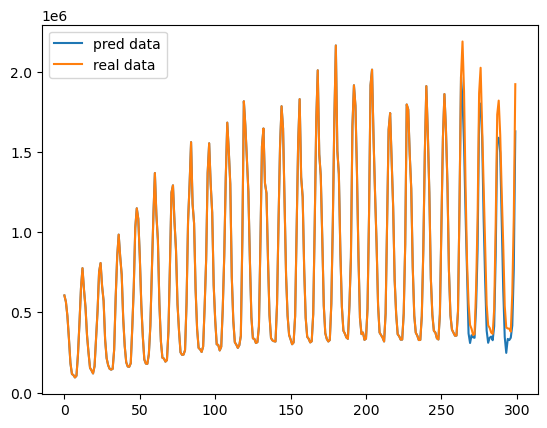

In [222]:
# 그림 그려서 확인하기
plt.plot(pred_civil_full, label="pred data")
plt.plot(civil_full, label="real data")
plt.legend()
plt.show()

### [3-2] ind 모델

In [223]:
model_ind = make_xgb_model(X_train_scaled, y_train_ind, X_test_scaled, y_test_ind)

-3.996878230873677


In [224]:
# 예측 데이터
pred_ind = list(model_ind.predict(X_test_scaled))
pred_ind_full = list(y_train_ind) + pred_ind

# 실제 데이터
ind = list(y_test_ind)
ind_full = list(y_train_ind) + ind

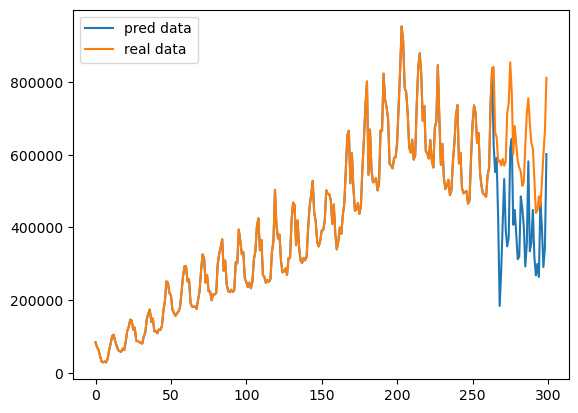

In [225]:
# 그림 그려서 확인하기
plt.plot(pred_ind_full, label="pred data")
plt.plot(ind_full, label="real data")
plt.legend()
plt.show()

### [3-3] 산업용 데이터 사용 모델

In [226]:
model_ind_2 = make_xgb_model(X_train_ind_scaled, y_train_ind, X_test_ind_scaled, y_test_ind)

-5.096068959529083


In [227]:
# 예측 데이터
pred_ind = list(model_ind_2.predict(X_test_ind_scaled))
pred_ind_full = list(y_train_ind) + pred_ind

# 실제 데이터
ind_full = list(y_train_ind) + list(y_test_ind)

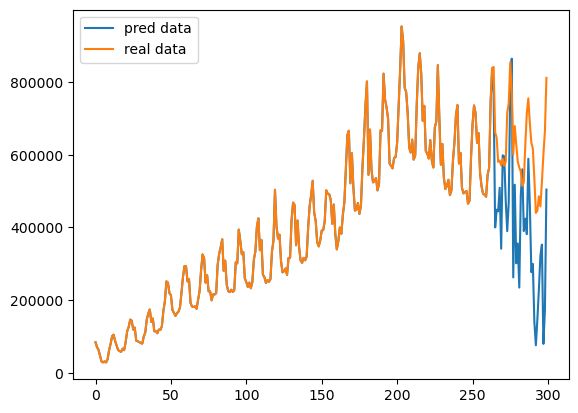

In [228]:
# 그림 그려서 확인하기
plt.plot(pred_ind_full, label="pred data")
plt.plot(ind_full, label="real data")
plt.legend()
plt.show()